In [ ]:
!pip install summarytools

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from summarytools import dfSummary
import datetime
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data and read first 5 rows

df = pd.read_csv("/content/drive/MyDrive/marketing_data.csv")

print(len(df))
df.head()

2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# Generate a detailed report of our dataset

dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID[int64],Mean (sd) : 5592.2 (3246.7)min < med < max:0.0 < 5458.5 < 11191.0IQR (CV) : 5599.5 (1.7),"2,240 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACq0lEQVR4nO3bTU4iQRiH8bcGP0ow3eEjsOMCJrMgccMBZjmHnSO4cDFrbsDOxBAIjISmYVbuROkqS/qPz2+LJaTzWP1WE91+vzeg7n6c+gMAx7g49QfA+XDO3ZjZVeDyzX6/fzn0IqHiUzjnbrrd7u8sy9oh6xeLxcw59+dQrISKz3KVZVl7PB6/5Hm+rrJwPp/7x8fH9vPz85WZESrSy/N83e/3/wUsvXnvRUI9IOW8heoI9Q2p5y1Ud7ahRu6I2e3tbX88Hi9SzFuortahRsTmO53OrzzPWyHvWxSFL8vy7vr6+iHFvIXqahtqzO23KApvZnf39/d/e73eour66XTankwmze1226i6Fml8GOoJDxXBjzteQ/PeFyE74mw2i9oRy7K8NLPMOReynIPYG94NtQ6HipDHHbGhxVitVpdFUfwcDoeNRqNR6Q/MjIPYIR/tqEkf4p6jzWZz4b1vjkaj9WAwmFVZ+12v2TGOmlFDH+KWZZlZ+C0w2+12lyEL66DVap3impmd6eiQ7DAVewt8PXmv1+sHMws5ecuJvWZmcaND7CO9lBtLslBjboFm3/PkHXvNYkaH2PNI6o0l+eOp0FvgKQ9EpxZ6zcyiRofgLznM0m8stX2OiupiRofYLzlSbyyEekZiRoe6j1qEeoZCRoe6j1r8zxQkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokXBzzQ/P53Ff9xcvl0puZrVYr//T01PzK9arvrfq5Y9cf09d/5I6UrA562QkAAAAASUVORK5CYII="">",0(0.0%)
2,Year_Birth[int64],Mean (sd) : 1968.8 (12.0)min < med < max:1893.0 < 1970.0 < 1996.0IQR (CV) : 18.0 (164.3),59 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACcUlEQVR4nO3cMY7aQBSA4TdhITYgWwgFOi4QiYKSQ+SwOUIKTkBLRWeBkBHOOhjjdJEiJcvaM17mWf9XM8sUf7HG88ZUVSWA7z49ewPAe7w8ewNwyxgTisig4fJrVVWvLvfjCqF2iDEmnE6n36IomjRZfz6fT8aY7z7GSqjdMoiiaLJer1/jOM7rLEzTNNhsNpPj8TgQEUJF++I4zmez2c8GS0Pnm3GEhymoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFXqJ6xPP0U3e/3vsv9+IJQPWJ7+qkoiqAsy695nv8QkSbv+r1FqH5pfPpJRGS/30+22+3wdrv12tjcMxGqh5qefjqdTt6efrJFqPijLMu+iETGmKZ/orUJAUKFiIhkWdYvimK5WCx6vV6v9r8dIu1OCBAqRETker2+BEEwXK1W+Xw+P9Vd3/aEAKHiL6PRqOl0gEiLEwL84A8VCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQocnG6BxWx+Z+fybRGqYzaz+V2ey7dFqO41ns3v8ly+LUJtSZPZ/C7P5dviYQoqECpUIFSoQKhQgVChAqFCBUKFCvyOCmcsr61888pKQoUTttdWPrqyklDhhM21le+5spJQ4ZTFtZVvvj7mYQoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFDKf/BtTx+IdR/4Foe/zwM1RgTiMjnD9iLT6LxePxluVzewjD8VWfh4XAIdrvdME3TUZIk1zprL5dLICKSZVmQJMmwzlrb9c/87jRNg0ef+Q2XKfNdF6QuEQAAAABJRU5ErkJggg=="">",0(0.0%)
3,Education[object],1. Graduation2. PhD3. Master4. 2n Cycle5. Basic,"1,127 (50.3%)486 (21.7%)370 (16.5%)203 (9.1%)54 (2.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACRUlEQVR4nO3bMWrjUBiF0V+DCZNGwhi8GC9iFjuL0G6MsYokpNEUU4WkiBV0JdnnbCCP8CHxjG4zjmNBwq+lD8DjEBsxYiOmqarnqnpa+iAb9D6O4+vSh9iS3eFw+NO27X7pg2zNMAyXpmn+Cu77dm3b7k+n02vXdW9LH2Yrrtfr777v9+fz+amqxPZNu6qqruvejsfjy9KH2ZjnpQ+wNS4IxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEbMrur/JzNLH2RL/L+m2Q3DcOn7fl8+mbnJMAyXqnpf+hxb4rPw6XwWfqPGbpQUFwRi1vQa9Vq6c6tZV1kr3b9VrKuslR7DmtZVfnq5cy4IxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEbMKtZVS/99MlazrrJWun8+CyfGuooYFwRikq9Rr8kHF1tXWU8RWVdZT1GVXVdZTz04FwRixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiIyayrrKeoiq4rrKewmfhxFhXEfOTJ5snFTeZPHgxYOFWkwYvBixM8ZPBiwELN/GjLjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZiJq2rrKWYYvK6ylqKW9kgEGNdRcxXTzZPLGbxaV1lNcVcPqyrrKaY01frKqspZuFHXWLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEfFhXWU0xp0/rKqsp5mKDQIx1FTEuCMSIjZh/O3UON/LmBqQAAAAASUVORK5CYII="">",0(0.0%)
4,Marital_Status[object],1. Married2. Together3. Single4. Divorced5. Widow6. Alone7. Absurd8. YOLO,864 (38.6%)580 (25.9%)480 (21.4%)232 (10.4%)77 (3.4%)3 (0.1%)2 (0.1%)2 (0.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAC4CAYAAAD0WZ4UAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZl

**Observations**
1. 2,240 customers with 29 attributes.
2. Our dataset has 24 null values in the ' Income ' column but no duplicates.
3. The dataset has attributes describing the customers, their purchases and their respective responses to various campaigns.
4. Some columns need cleaning; changing datatypes
5. 'ID', 'Z_CostContact' and 'Z_Revenue' do not add much information to our analysis.


### **Cleaning**

---



In [5]:
# Drop rows with missing values
df = df.dropna()
print(df.shape)

# Convert the "Dt_Customer" column to datetime64[ns]
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
print(df["Dt_Customer"].dtype)

(2216, 29)
datetime64[ns]


<ipython-input-5-d2fff679e24b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])


In [6]:
df = df.reset_index(drop=True)

### **Feature Engineering**

---



To perform **customer profile analysis**, we need to engineer some features
1. Age: Extract the age of each customer from their year of birth (Year_Birth).
2. Customer Duration: Calculate the duration (in years) that each customer has been with the company. This can be done by subtracting the year the customer joined from the current year.
3. Number of Children: Determine the total number of children each customer has, regardless of their age.
4. Total Money Spent: Calculate the total amount of money each customer has spent with the company. This can be done by summing up all of their transactions.
5. Marital Status & Education : Category reduction is important for these columns to make the data easier to understand.

In [7]:
def fengineer_data(df):

    # Create 'Age' column
    df.loc[:, 'Age'] = date.today().year - df['Year_Birth']

    # Number of children
    df.loc[:, 'Num_Children'] = df['Kidhome'] + df['Teenhome']

    # Total amount spent
    df.loc[:, 'Amount_Spent'] = df['MntFishProducts'] + df['MntFruits'] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

    # Duration as a customer
    df["Customer_Duration"] = datetime.date.today().year - df["Dt_Customer"].dt.year

    # Number of previous responses
    df.loc[:, "Prev_Responses"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"]+ df["AcceptedCmp5"]

    # Marital Status
    df.loc[:, "Marital_Status"] = df["Marital_Status"].apply(lambda x: "Single" if x in ["Divorced", "Widow", "Together", "Absurd", "YOLO"] else "Married")

    # Education
    df.loc[:, "Education"] = df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

    return df

df = fengineer_data(df)
print(df.shape)

(2216, 34)


In [8]:
df["Customer_Duration"].describe()

count    2216.000000
mean       10.971570
std         0.685618
min        10.000000
25%        11.000000
50%        11.000000
75%        11.000000
max        12.000000
Name: Customer_Duration, dtype: float64

In [9]:
# Drop redundant columns

redundant_columns = ['ID', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer', 'Year_Birth']
df = df.drop(redundant_columns, axis=1)
df.shape

(2216, 29)

##**Exploratory Analysis**

## **Univariate Analysis**

**Age**

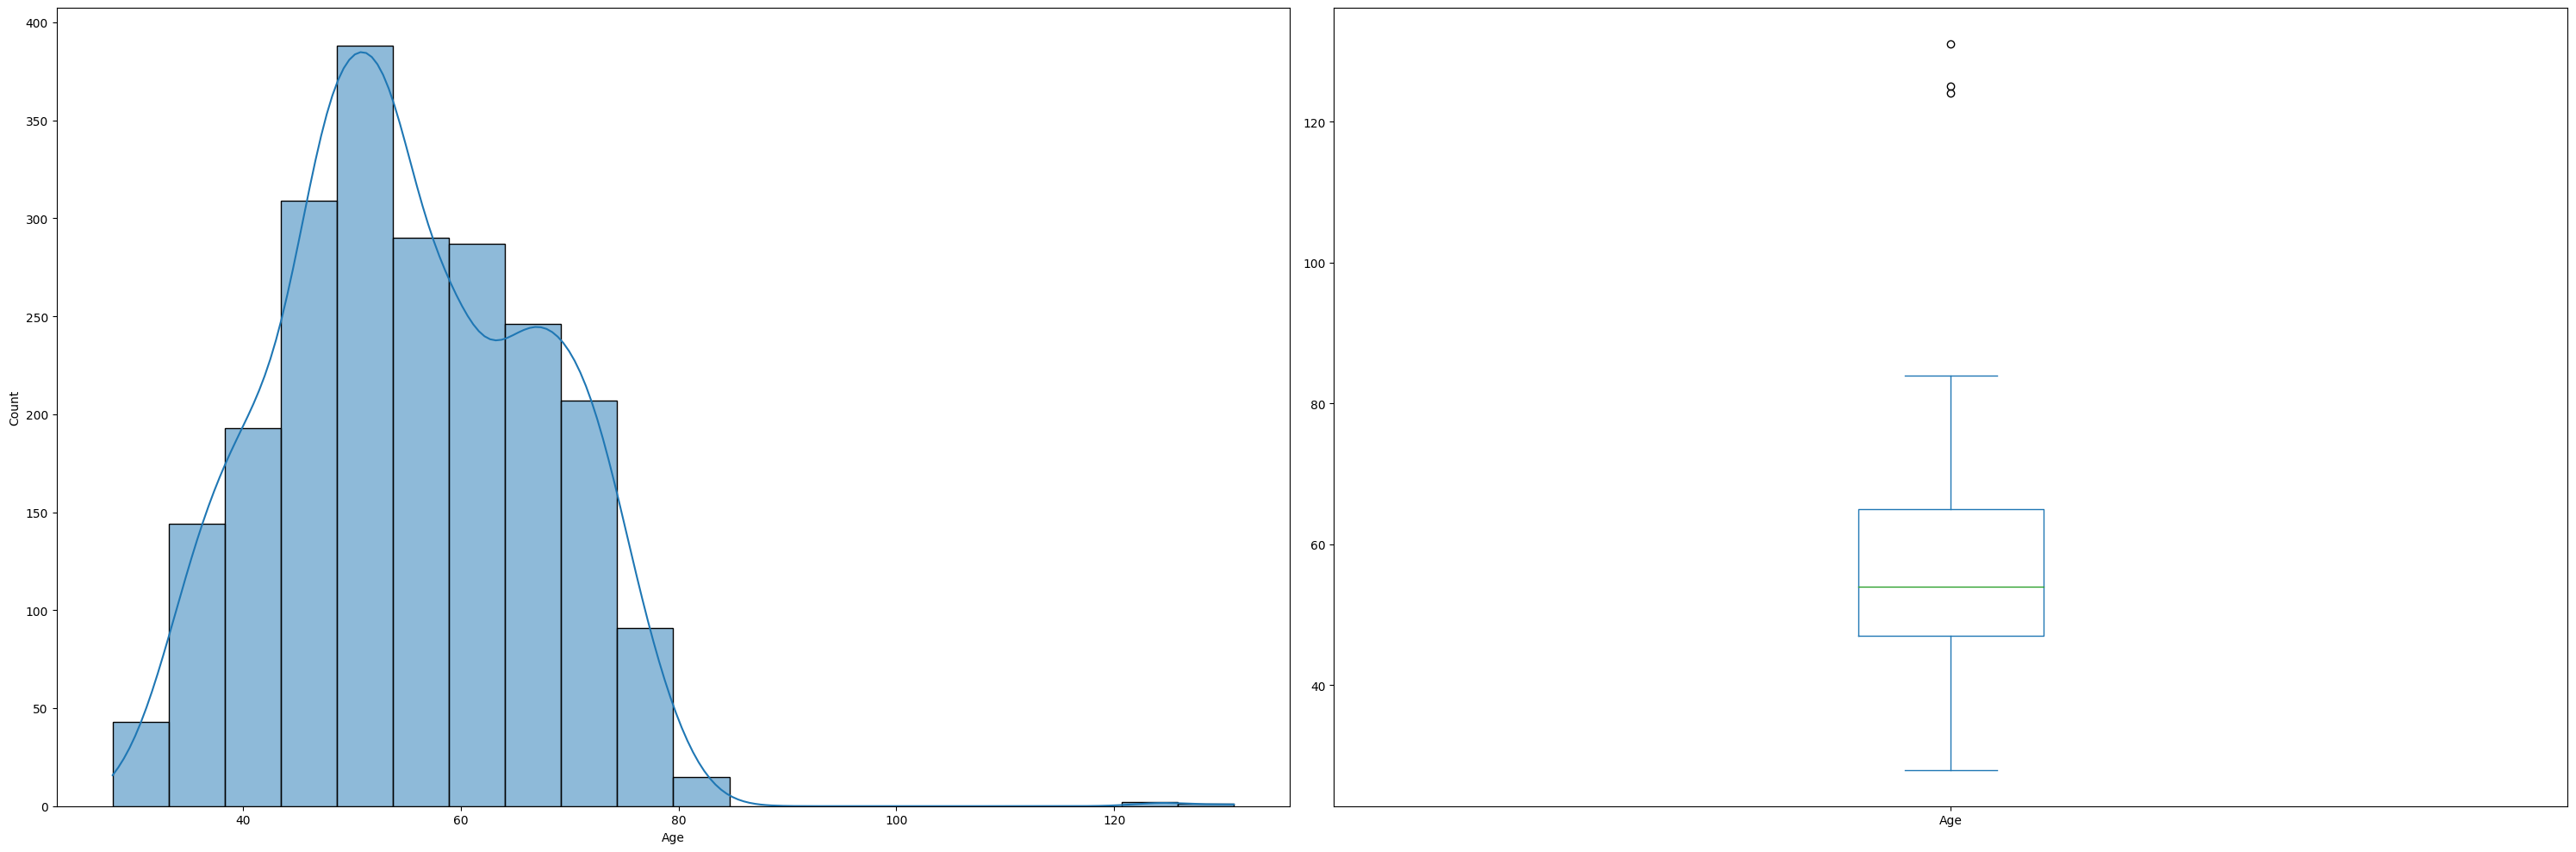

In [10]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
sns.histplot(df["Age"], kde=True, bins=20)
plt.subplot(1, 2, 2)
df["Age"].plot(kind="box");
plt.tight_layout()

In [11]:
df['Age'].describe()

count    2216.000000
mean       55.179603
std        11.985554
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: Age, dtype: float64

The average customer is 55 yrs old with the youngest being 28 yrs old.
The oldest is 131 yrs old which is an outlier.

In [12]:
# Customers older than 100 yrs old with selected attributes
df_filtered = df[df['Age'] > 100][['Age',"Income", 'Education', 'Marital_Status', 'Prev_Responses', 'Response', 'Amount_Spent']]
print(df_filtered.head())

     Age   Income      Education Marital_Status  Prev_Responses  Response  \
181  124  36640.0  Undergraduate         Single               0         0   
228  131  60182.0  Undergraduate        Married               0         0   
326  125  83532.0   Postgraduate         Single               1         0   

     Amount_Spent  
181            57  
228            21  
326          1202  


In [14]:
# Remove outliers in the 'Age' column
df = df.loc[df['Age'] < 100]
df.shape

(2213, 29)

**Income**

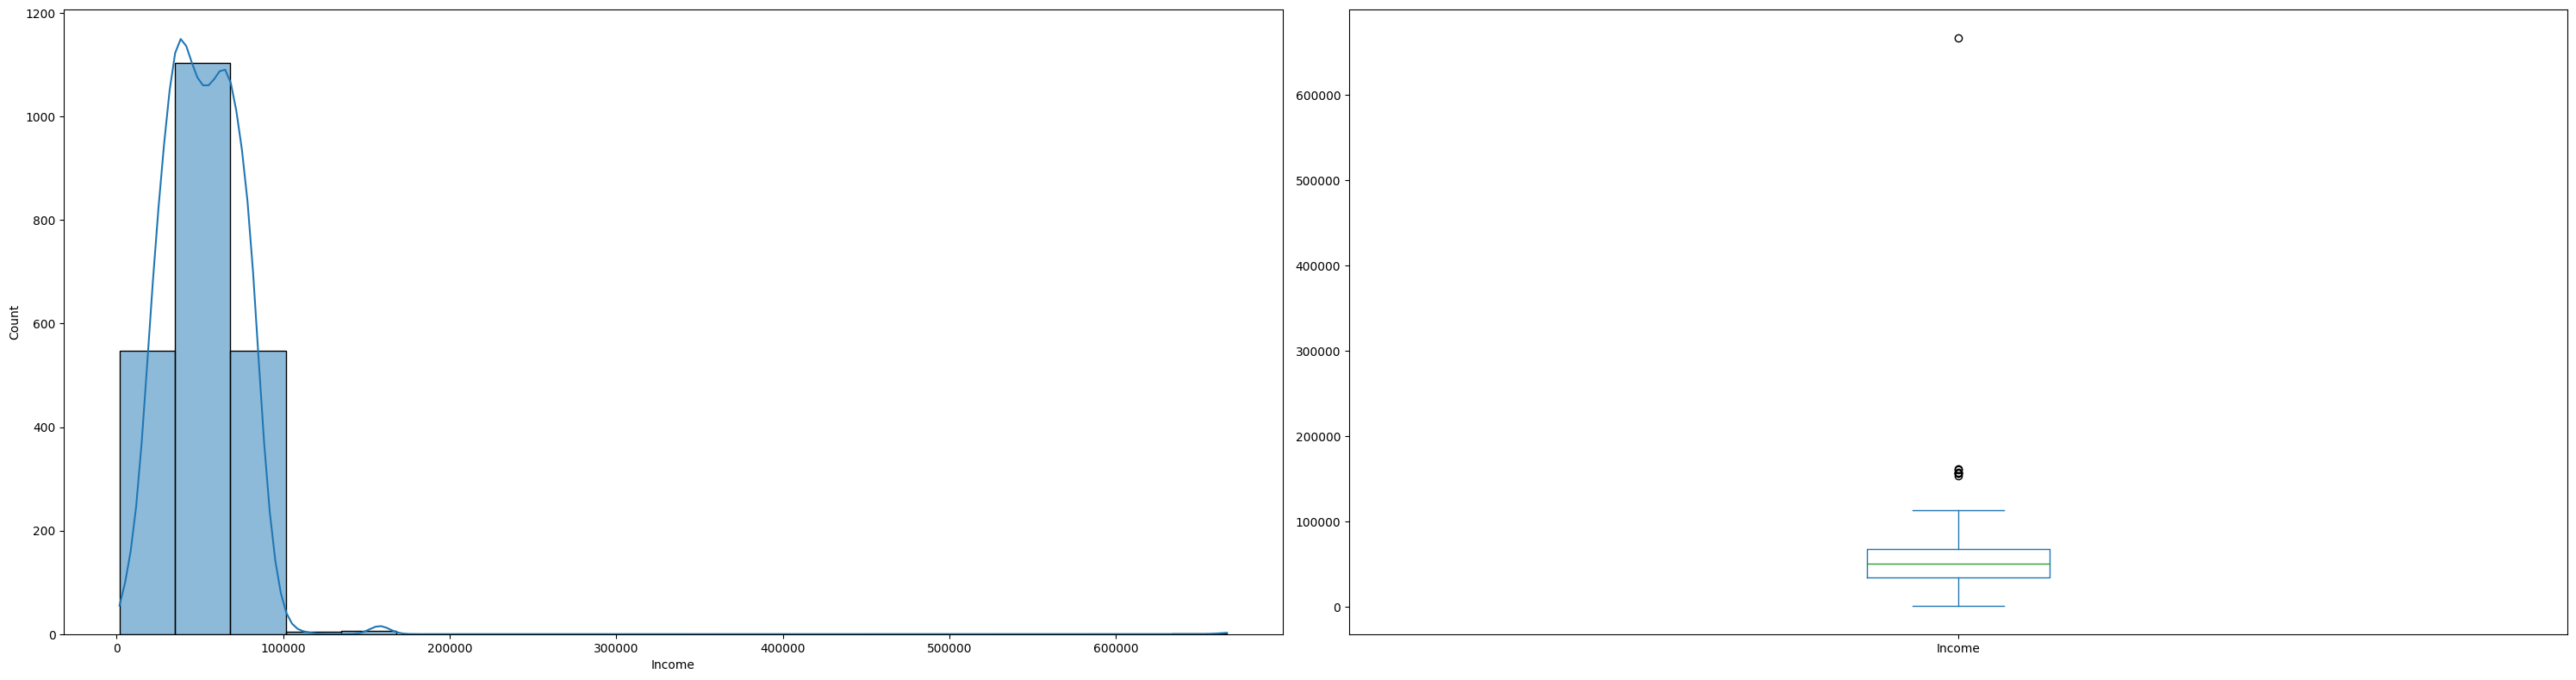

In [15]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
sns.histplot(df['Income'],kde=True, bins=20)
plt.subplot(1, 2, 2)
df['Income'].plot(kind='box');
plt.tight_layout()

In [17]:
# Customers with income > 100000 with selected columns

df_filtered = df[df['Income'] > 100000][['Age',"Income", 'Education', 'Marital_Status', 'Prev_Responses', 'Response', 'Amount_Spent']]
print(df_filtered)

      Age    Income     Education Marital_Status  Prev_Responses  Response  \
115    41  101970.0      Graduate        Married               3         1   
153    51  157243.0  Postgraduate        Married               0         0   
192    47  102160.0  Postgraduate         Single               3         1   
241    50  102692.0      Graduate         Single               4         1   
604    48  162397.0  Postgraduate         Single               0         0   
633    54  105471.0      Graduate         Single               2         1   
642    49  153924.0      Graduate         Single               0         0   
674    42  160803.0  Postgraduate        Married               0         0   
1287   53  157733.0  Postgraduate         Single               0         0   
1636   47  157146.0      Graduate         Single               0         0   
1881   79  113734.0  Postgraduate        Married               0         0   
2109   75  156924.0  Postgraduate        Married               0

The customer who earns 666,666 does not spend much and has not responded positively to any of the campaigns

In [18]:
# Drop row with 666,666 income

df = df.drop(df[df['Income'] == 666666].index)

**Total amount spent**

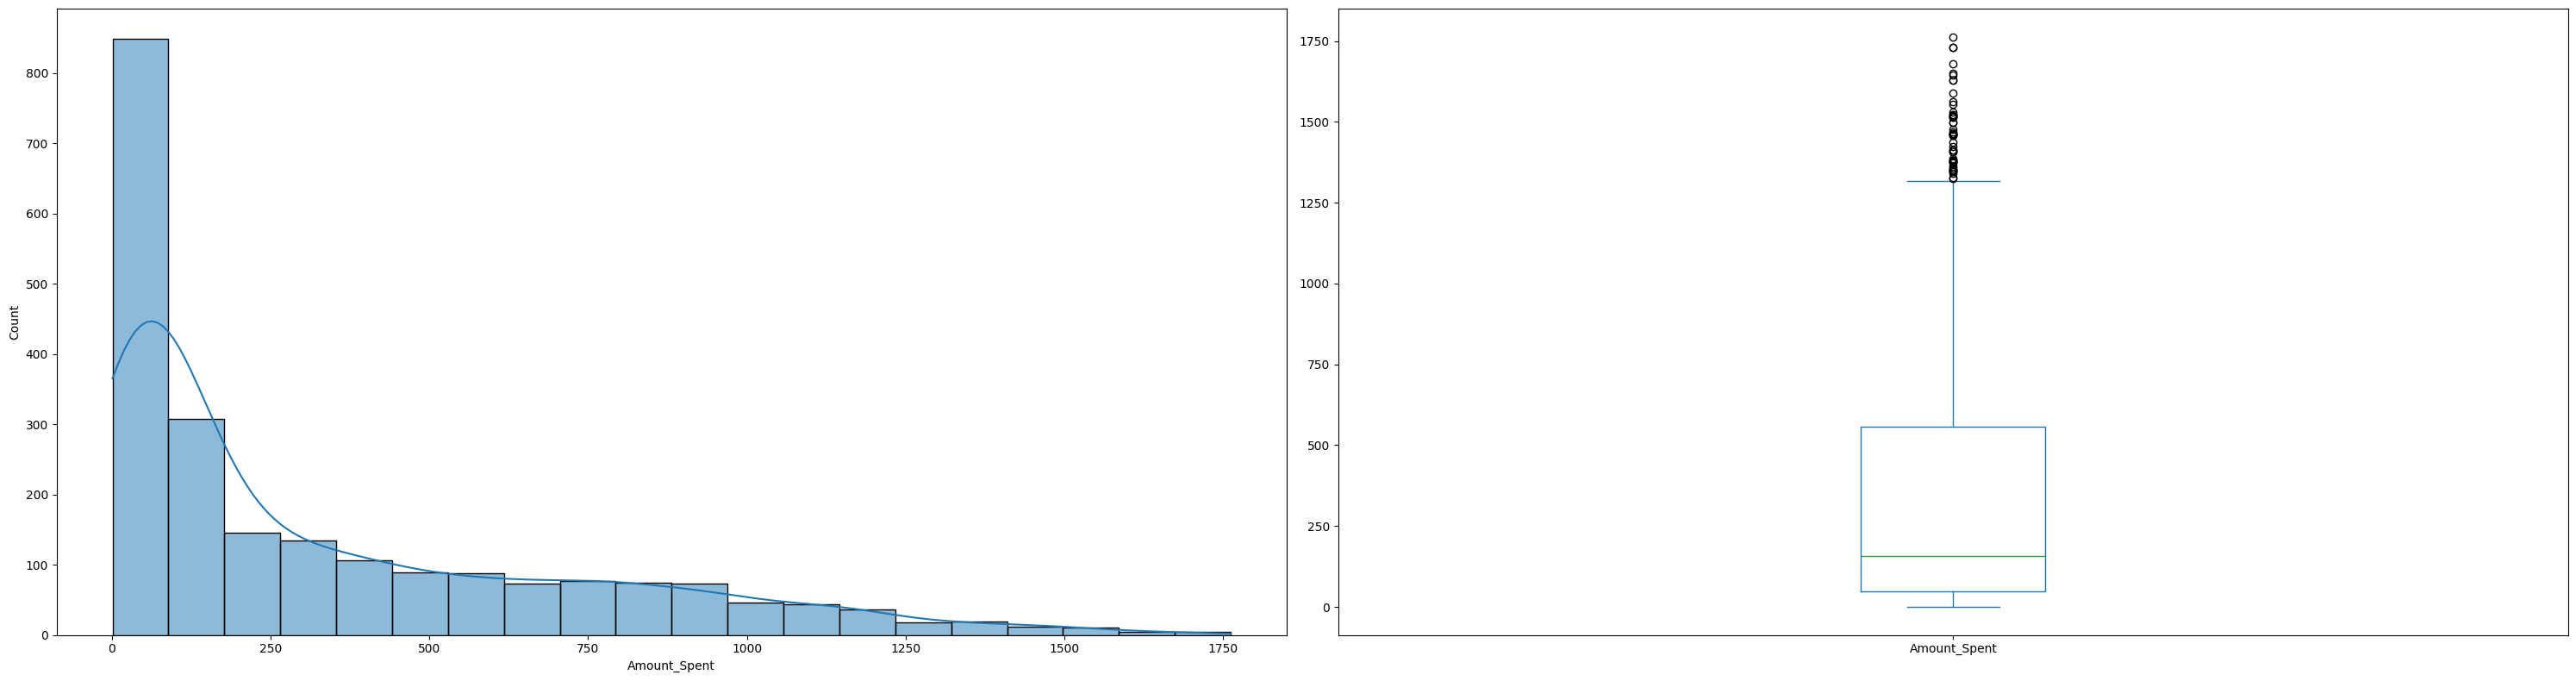

In [19]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
sns.histplot(df['Amount_Spent'],kde=True,bins=20)
plt.subplot(1, 2, 2)
df['Amount_Spent'].plot(kind='box');
plt.tight_layout()

In [20]:
df["Amount_Spent"].describe()

count    2212.000000
mean      339.629295
std       380.157849
min         1.000000
25%        47.000000
50%       158.000000
75%       557.000000
max      1762.000000
Name: Amount_Spent, dtype: float64

**Number of children**


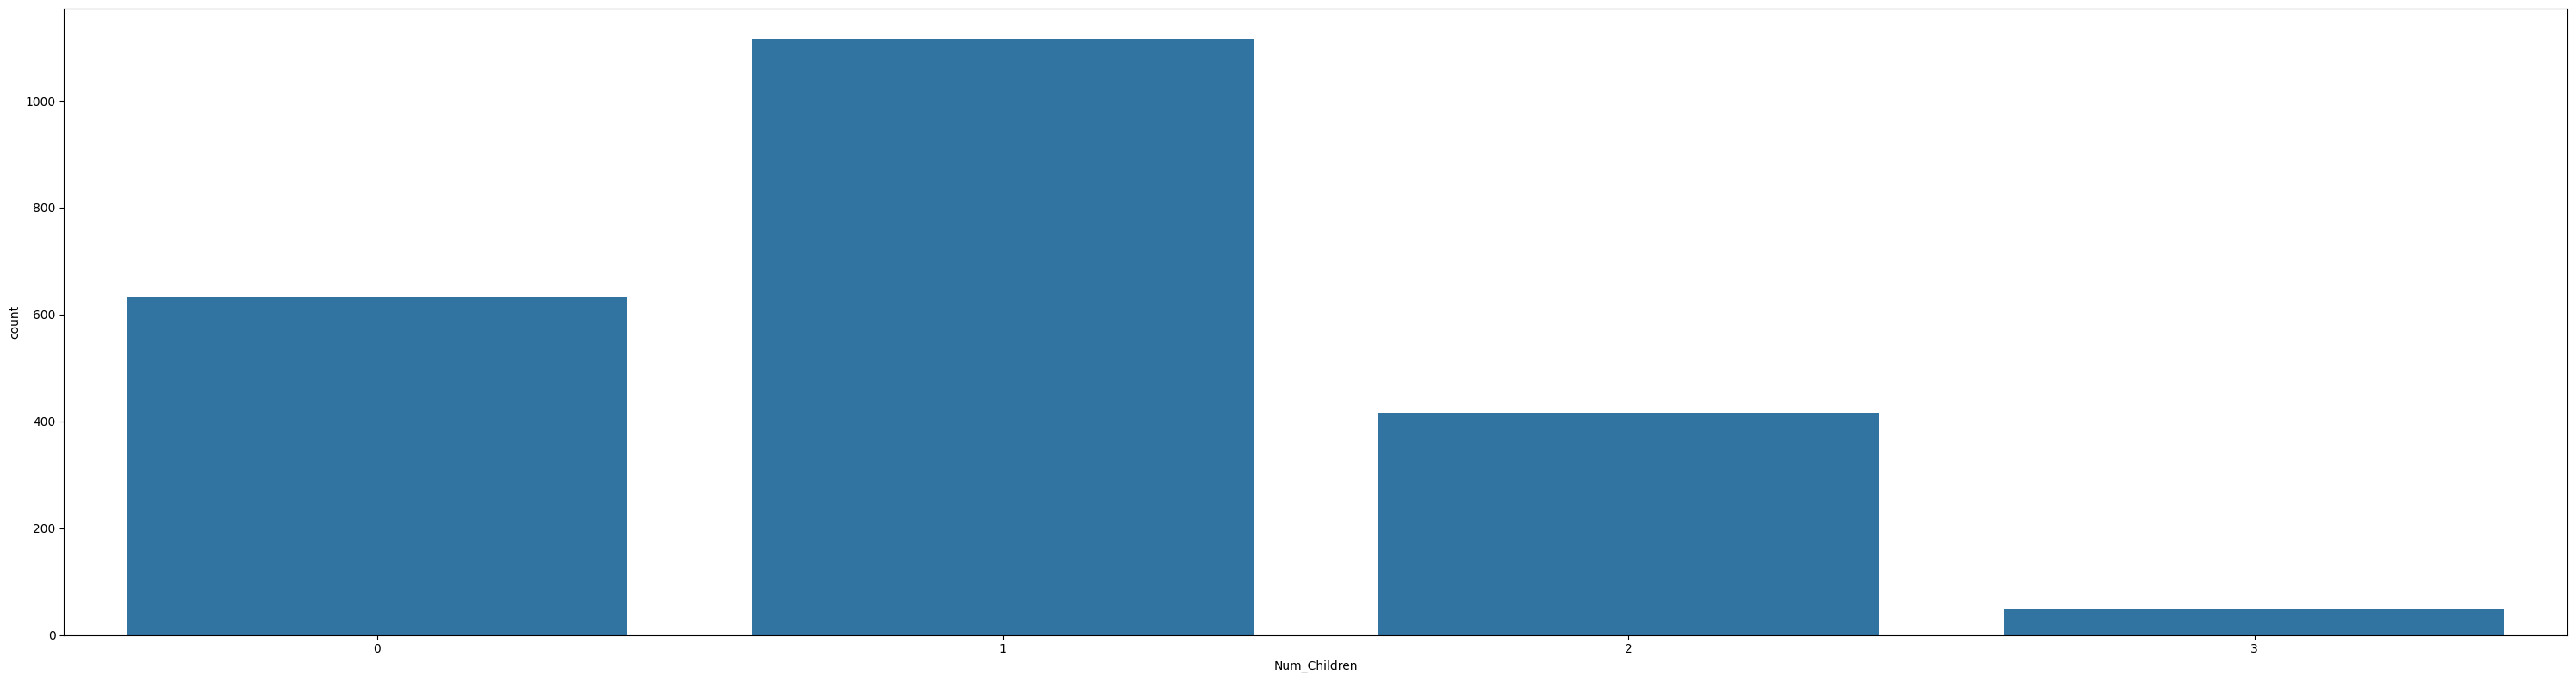

In [37]:
plt.figure(figsize=(30, 8))
sns.countplot(x="Num_Children", data=df)
plt.tight_layout();

Most of the customers have at least one child

**Marital Status**

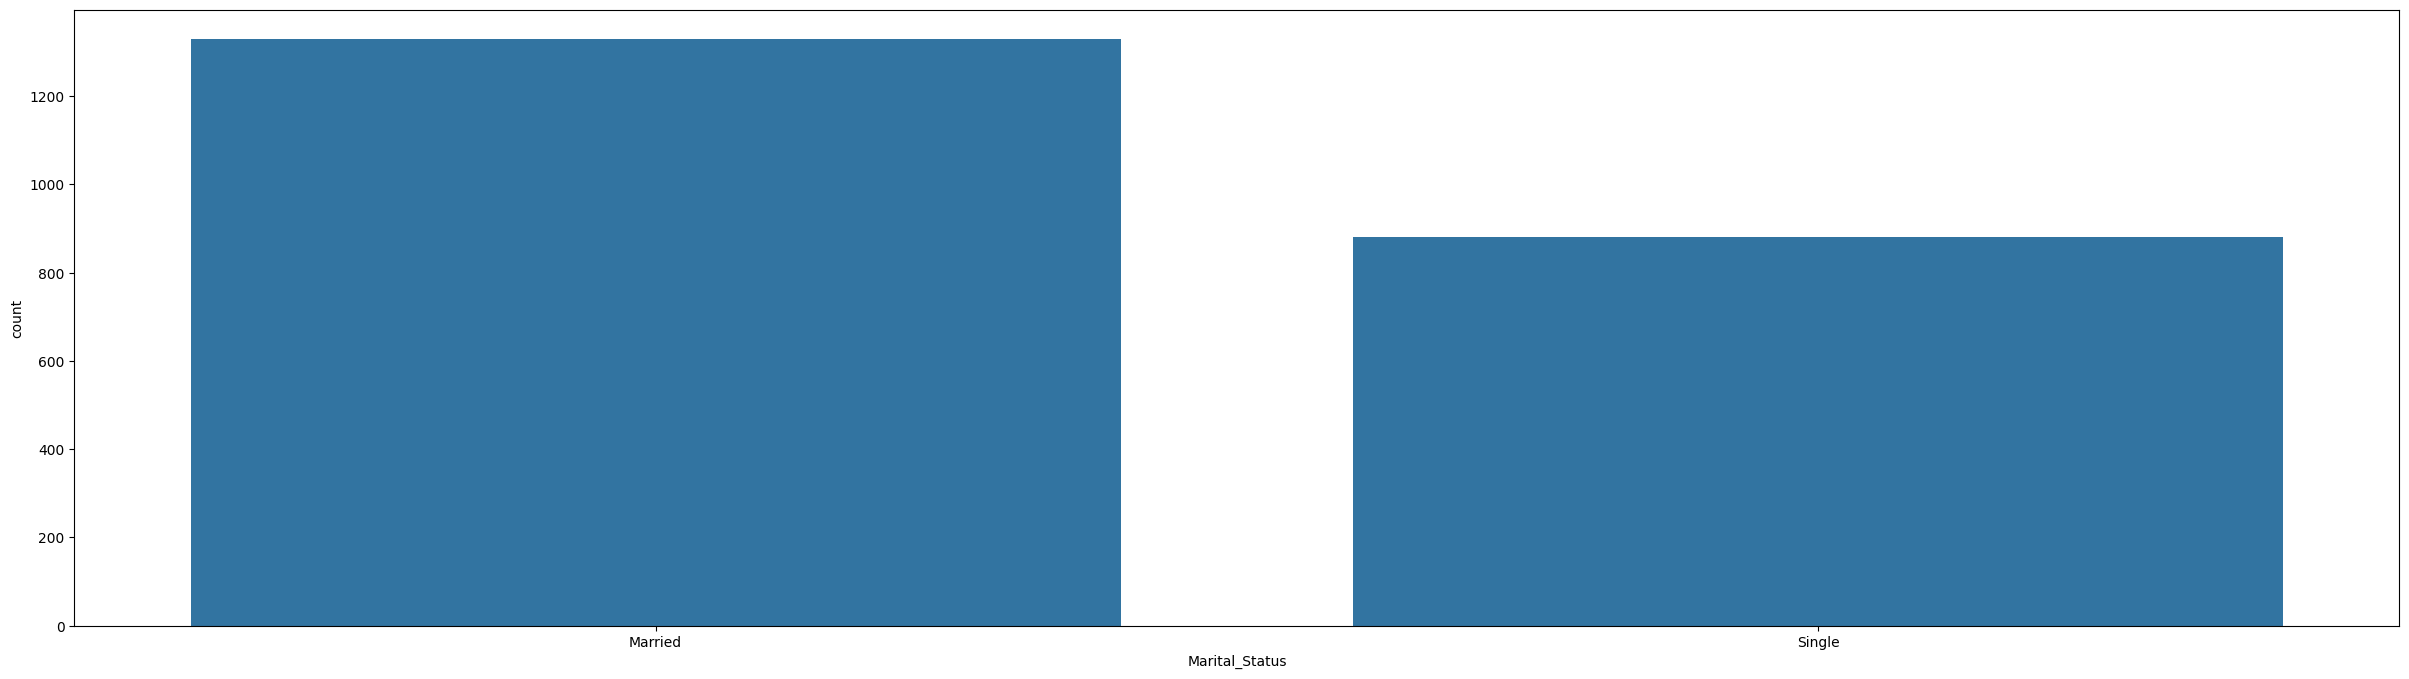

In [21]:
plt.figure(figsize=(30, 8))
sns.countplot(x="Marital_Status", data=df);

**Education**

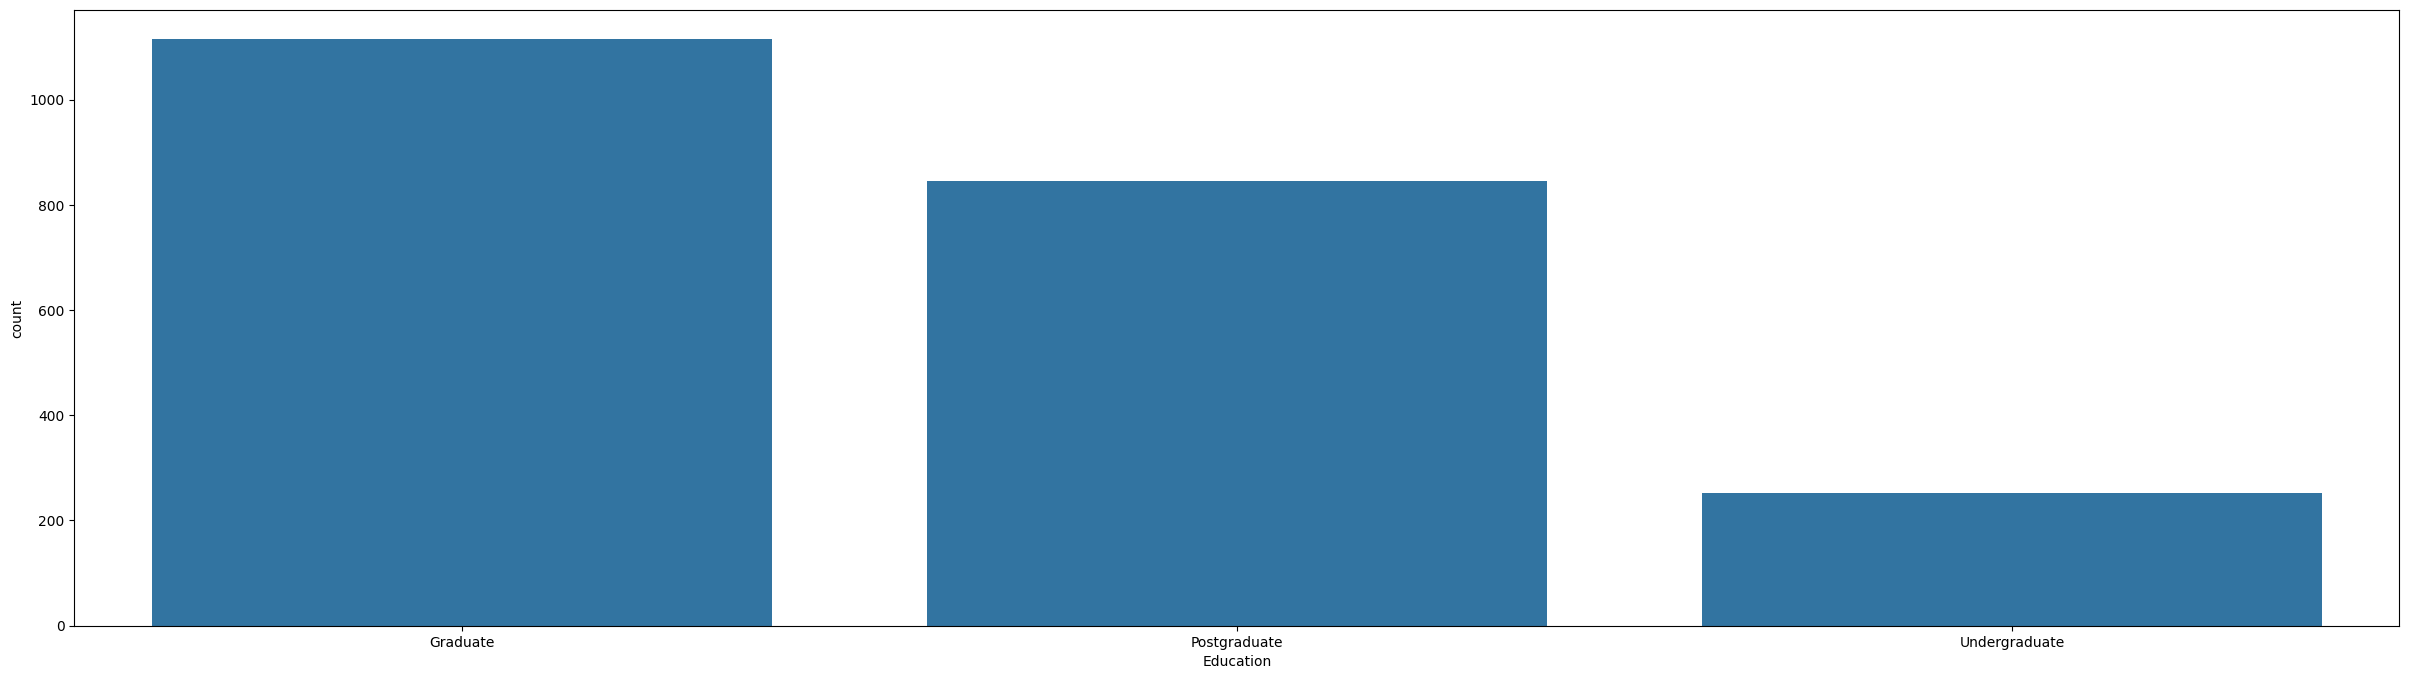

In [23]:
plt.figure(figsize=(30, 8))
sns.countplot(x="Education", data=df);

In [39]:
df[["Marital_Status", "Education"]].value_counts()

Marital_Status  Education    
Married         Graduate         676
                Postgraduate     501
Single          Graduate         440
                Postgraduate     345
Married         Undergraduate    154
Single          Undergraduate    100
Name: count, dtype: int64

**Responses**

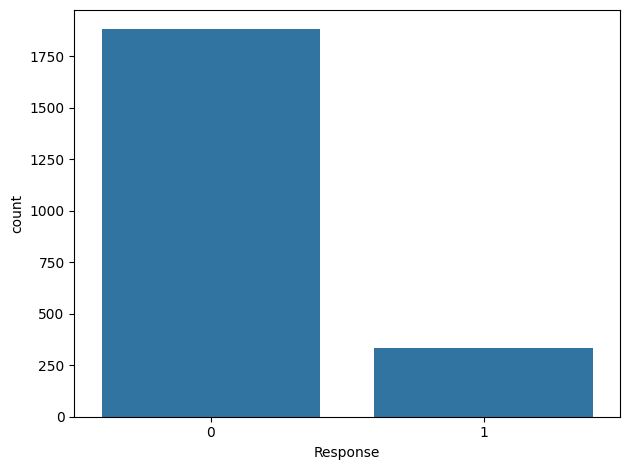

In [52]:
sns.countplot(x="Response", data=df)
plt.tight_layout();

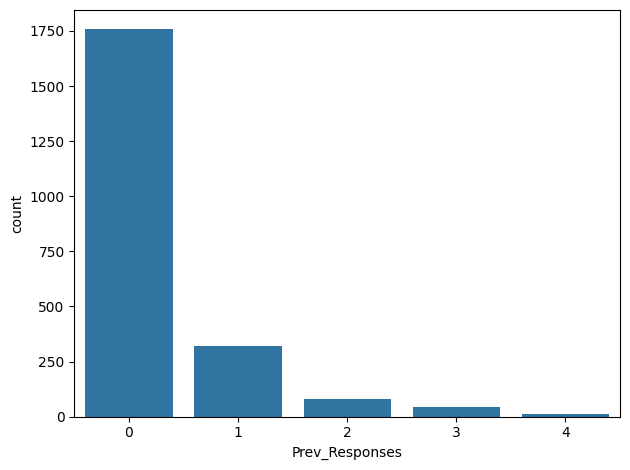

In [41]:
sns.countplot(x="Prev_Responses", data=df)
plt.tight_layout();

In [42]:
df[["Response", "Prev_Responses"]].value_counts()

Response  Prev_Responses
0         0                 1611
          1                  223
1         0                  146
          1                  100
          2                   42
0         2                   39
1         3                   35
          4                   10
0         3                    9
          4                    1
Name: count, dtype: int64

In [43]:
Total_Responses = df["Prev_Responses"] + df["Response"]
Total_Responses.value_counts()

0    1611
1     369
2     139
3      51
4      36
5      10
Name: count, dtype: int64

No customer responded positively to all the campaigns

Only 10 customers did for 5 campaigns

## **Multivariate Analysis**

In [44]:
df[["Response", "Complain"]].value_counts()

Response  Complain
0         0           1865
1         0            330
0         1             18
1         1              3
Name: count, dtype: int64

In [45]:
pd.crosstab(df['Marital_Status'], df['Response'])

Response,0,1
Marital_Status,,
Married,1126,205
Single,757,128


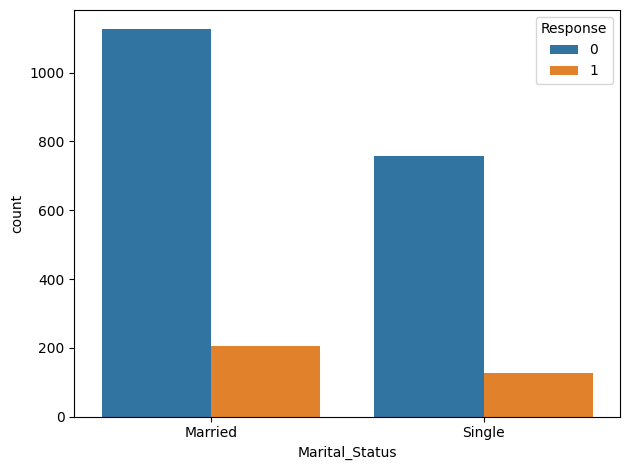

In [46]:
sns.countplot(data=df, x="Marital_Status", hue="Response")
plt.tight_layout();

In [47]:
pd.crosstab(df['Education'], df['Response'])

Response,0,1
Education,,
Graduate,964,152
Postgraduate,689,157
Undergraduate,230,24
